In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
#%matplotlib.inline # for showing the figure in Notebook itself

In [2]:
from wordcloud import WordCloud

In [3]:
filename = '/content/fifa.csv'
ffa = pd.read_csv(filename)#Reading the data from csv

In [4]:
#Checking the first 10 rows of data
ffa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
#checking the all info about data
ffa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [6]:
#checking for any duplicated values
ffa.duplicated().any()

False

In [7]:
#checking number of rows and columns
ffa.shape

(18207, 89)

In [8]:
#dropping the unwanted column 'Unnamed'
ffa = ffa.drop(columns='Unnamed: 0')

In [9]:
#checking for null values
ffa.isnull().sum()

ID                   0
Name                 0
Age                  0
Photo                0
Nationality          0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 88, dtype: int64

I will deal with the missing values later

In [10]:
ffa.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [11]:
#Imputting the missing values

In [12]:
#First I'm separting the categorical columns and numerical columns so that I can impute seprate imputation techiniques


In [13]:
ffa['Club'].value_counts()

FC Barcelona                 33
Valencia CF                  33
Fortuna Düsseldorf           33
Cardiff City                 33
Rayo Vallecano               33
                             ..
América FC (Minas Gerais)    20
Fluminense                   20
Sligo Rovers                 19
Limerick FC                  19
Derry City                   18
Name: Club, Length: 651, dtype: int64

In [14]:
ffa['Position'].value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [15]:
ffa['Club'].fillna('Not_Playing_Club',inplace=True)
ffa['Position'].fillna('ST',inplace=True)

In [16]:
#Separating all the categorical and numerical values
ffa_cat = ffa.select_dtypes(include='object')
ffa_num = ffa.select_dtypes(include='number')

In [17]:
ffa_cat.head()

,Name,Photo,Nationality,Flag,Club,Club Logo,Value,Wage,Preferred Foot,Work Rate,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Release Clause
0,L. Messi,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,Left,Medium/ Medium,...,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,€226.5M
1,Cristiano Ronaldo,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,Right,High/ Low,...,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,€127.1M
2,Neymar Jr,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,Right,High/ Medium,...,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,€228.1M
3,De Gea,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,Right,Medium/ Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,€138.6M
4,K. De Bruyne,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,Right,High/ High,...,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,€196.4M


In [18]:
for i in ffa_cat.columns:
  ffa[i].fillna(ffa[i].mode(),inplace=True)

In [19]:
for j in ffa_num.columns:
  ffa[j].fillna(ffa[j].mean(),inplace = True)

In [20]:
ffa.isnull().any().sum()

36

In [21]:
ffa.fillna(0,inplace= True)

In [22]:
ffa.isnull().any().sum()

0

In [23]:
cr = ffa.corr()

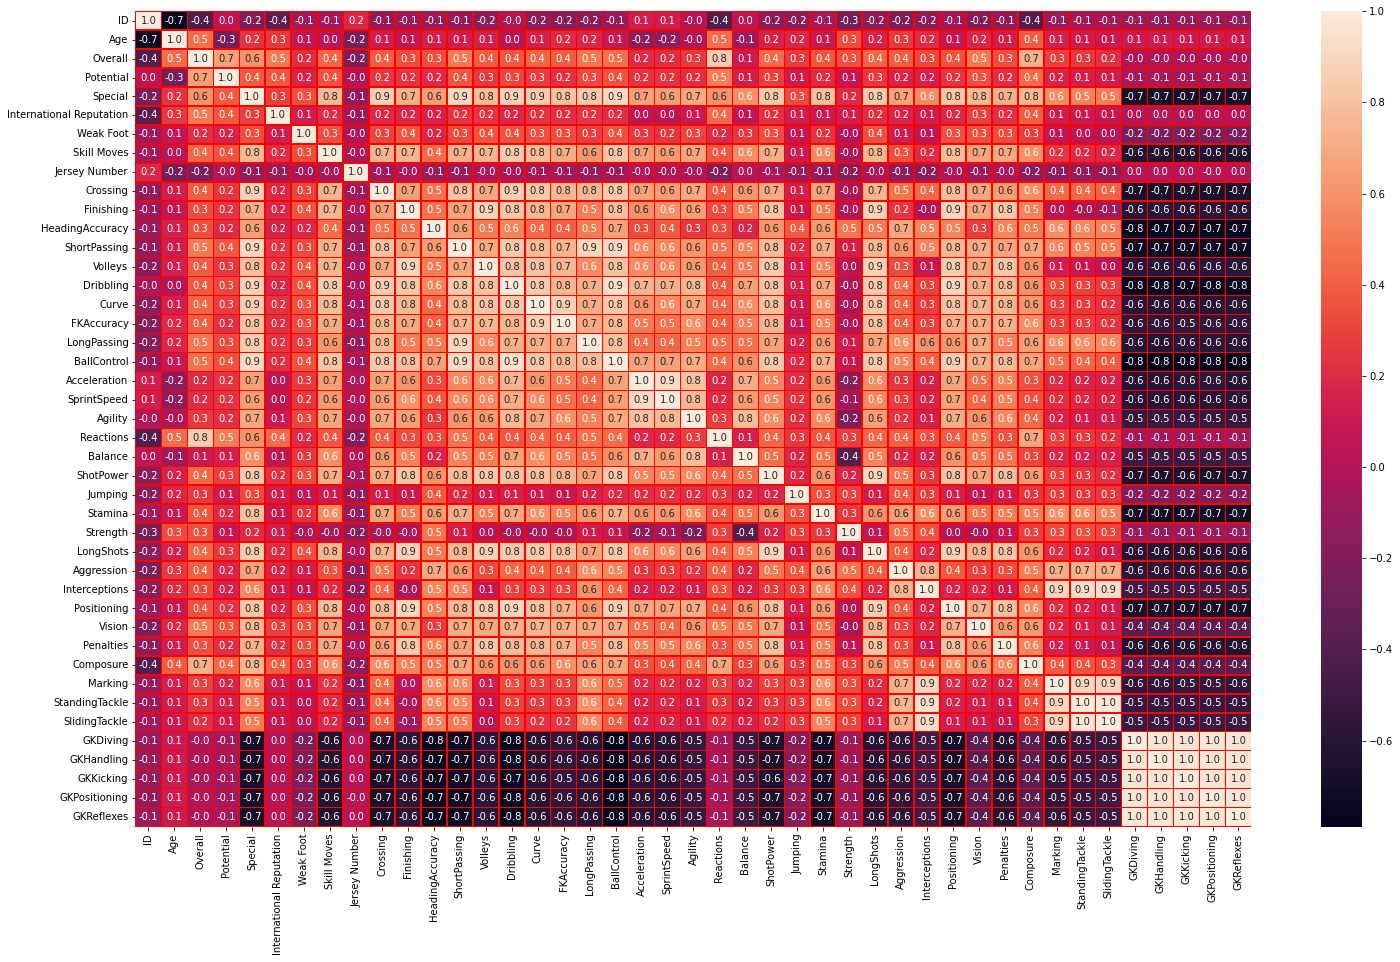

In [24]:
f,ax = plt.subplots(figsize=(25, 15))
sns.heatmap(cr, annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

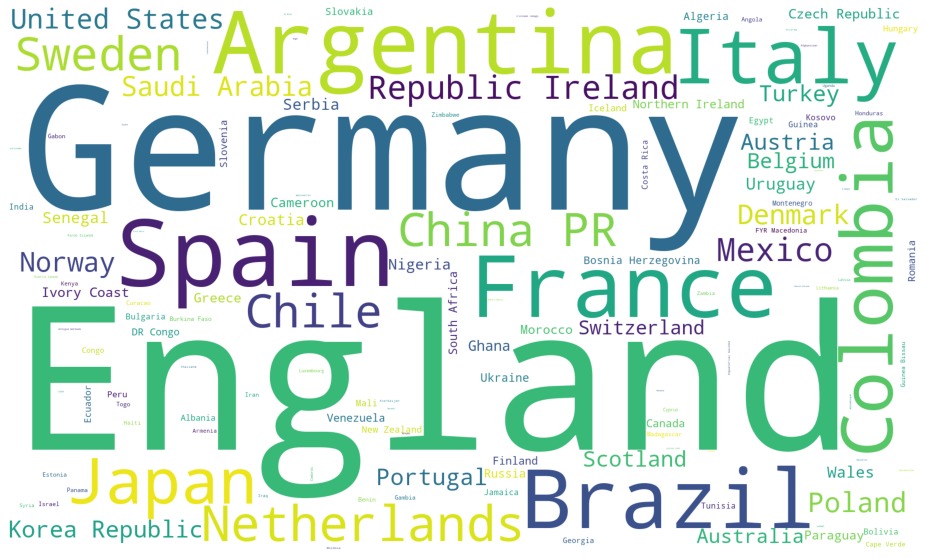

In [25]:
plt.figure(figsize=(20,10))
text3 = ' '.join(ffa['Nationality'])

wordcloud1 = WordCloud(background_color='white',
                          width=1830,
                          height=1090).generate(text3)

plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

Univariate Analysis

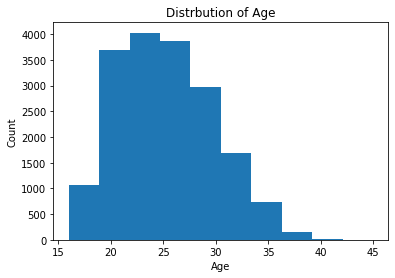

In [26]:
#Analysis of Age, since age plays important role in performance 
plt.hist(ffa['Age'],bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distrbution of Age')
plt.show()
sns.set()

we can see that most av

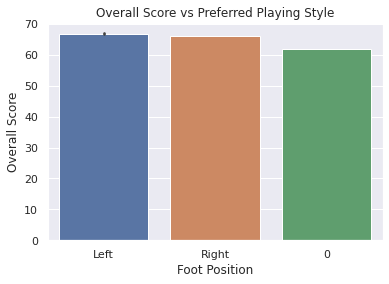

<Figure size 1800x1800 with 0 Axes>

In [27]:
sns.barplot(x=ffa['Preferred Foot'],y =ffa['Overall'])
plt.xlabel('Foot Position')
plt.ylabel('Overall Score')
plt.title('Overall Score vs Preferred Playing Style')
plt.show()
plt.figure(figsize=(25,25))
sns.set()

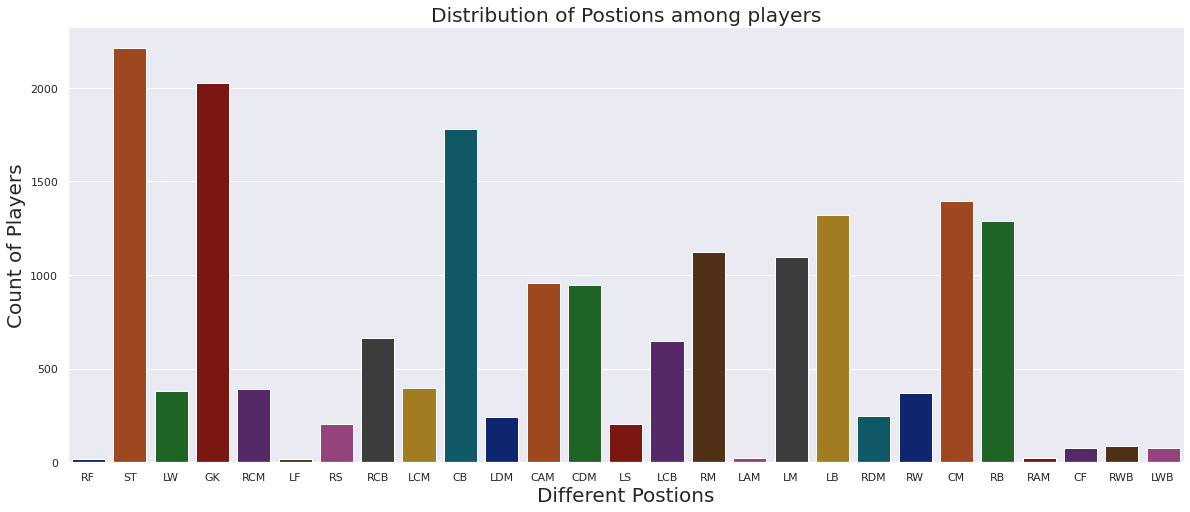

In [28]:
#Positions acquired by the players
plt.figure(figsize=(20,8))
sns.countplot('Position',data = ffa,palette='dark')
plt.style.use('fivethirtyeight')
plt.xlabel('Different Postions',fontsize=20)
plt.ylabel('Count of Players',fontsize=20)
plt.title('Distribution of Postions among players')
plt.show()

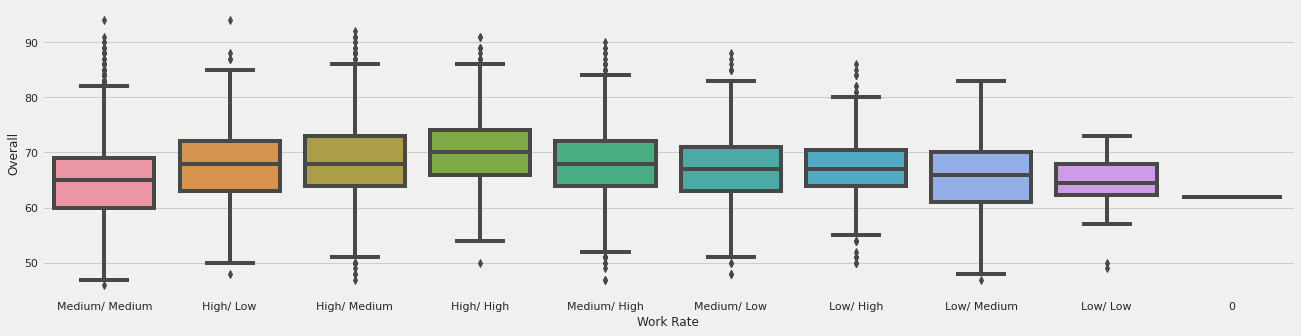

In [30]:
plt.rcParams.update({'font.size': 10})
plt.subplots(figsize=(20, 5))
sns.boxplot(data = ffa, x='Work Rate', y = 'Overall')

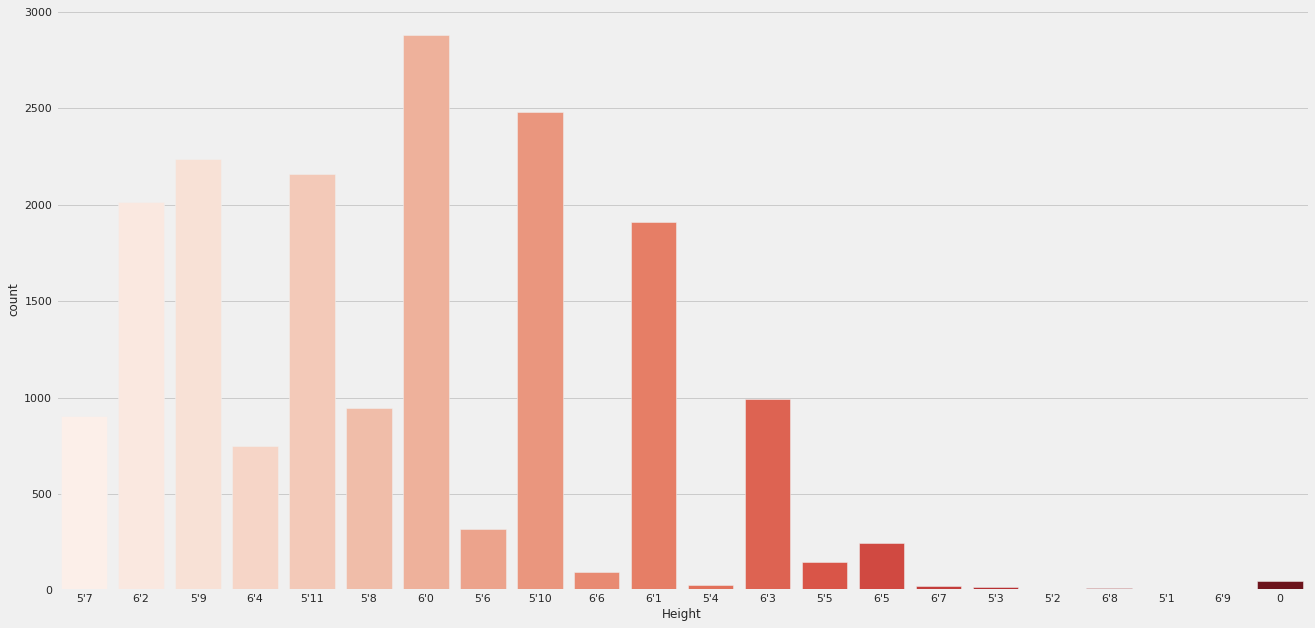

In [31]:
plt.figure(figsize=(20,10))
sns.countplot(x='Height',data=ffa,palette='Reds')
plt.show()

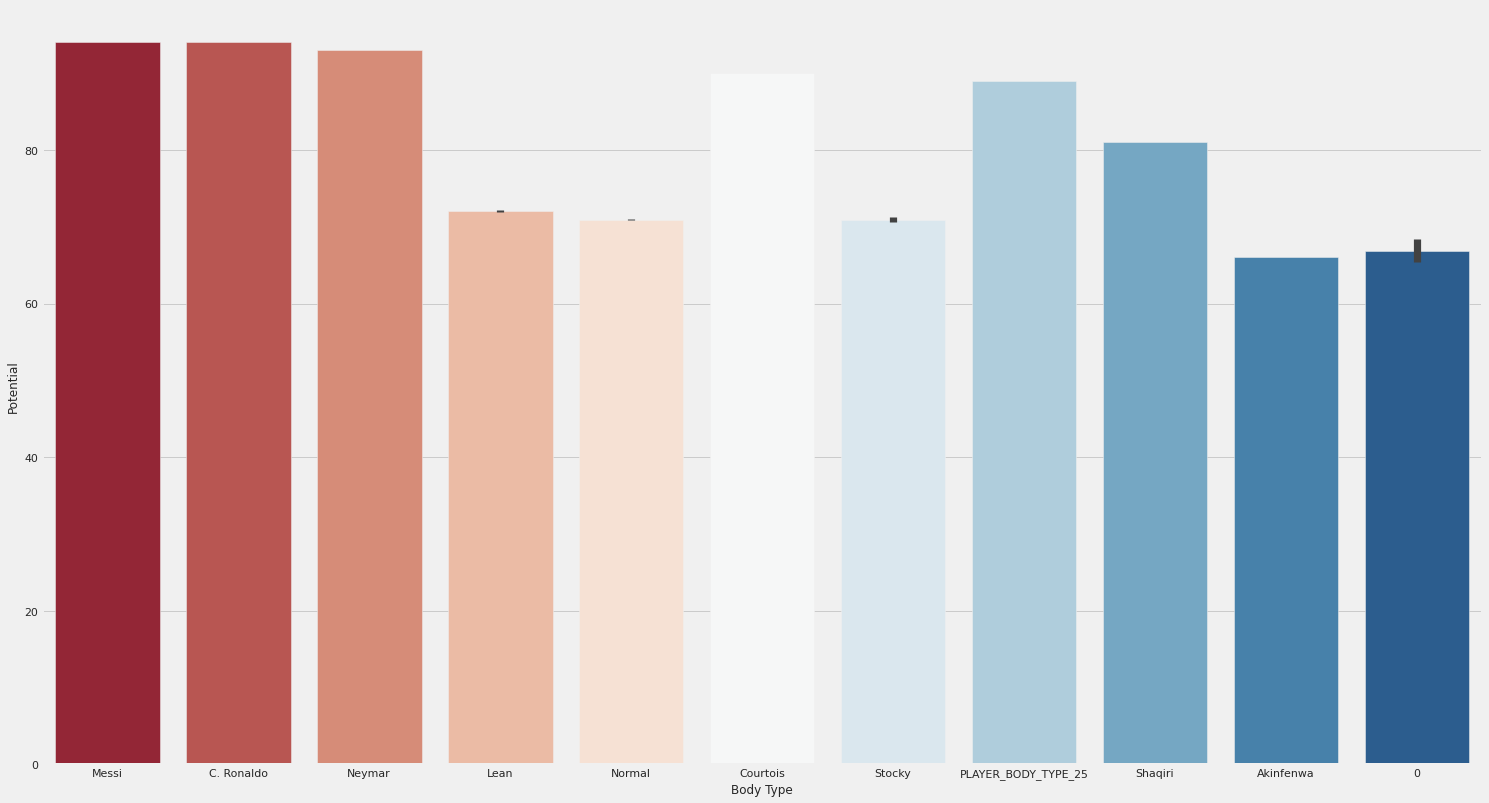

In [32]:
plt.figure(figsize=(23,13))
sns.barplot(x='Body Type',y='Potential',data=ffa,palette='RdBu')
plt.show()

In [39]:
#top 10 left foot players
left = ffa[ffa['Preferred Foot']=='Left'][['Name','Age','Nationality','Club']].head(10)
left

,Name,Age,Nationality,Club
0,L. Messi,31,Argentina,FC Barcelona
13,David Silva,32,Spain,Manchester City
15,P. Dybala,24,Argentina,Juventus
17,A. Griezmann,27,France,Atlético Madrid
19,T. Courtois,26,Belgium,Real Madrid
24,G. Chiellini,33,Italy,Juventus
26,M. Salah,26,Egypt,Liverpool
28,J. Rodríguez,26,Colombia,FC Bayern München
35,Marcelo,30,Brazil,Real Madrid
36,G. Bale,28,Wales,Real Madrid


In [40]:
Right = ffa[ffa['Preferred Foot']=='Right'][['Name','Age','Nationality','Club']].head(10)
Right

,Name,Age,Nationality,Club
1,Cristiano Ronaldo,33,Portugal,Juventus
2,Neymar Jr,26,Brazil,Paris Saint-Germain
3,De Gea,27,Spain,Manchester United
4,K. De Bruyne,27,Belgium,Manchester City
5,E. Hazard,27,Belgium,Chelsea
6,L. Modrić,32,Croatia,Real Madrid
7,L. Suárez,31,Uruguay,FC Barcelona
8,Sergio Ramos,32,Spain,Real Madrid
9,J. Oblak,25,Slovenia,Atlético Madrid
10,R. Lewandowski,29,Poland,FC Bayern München


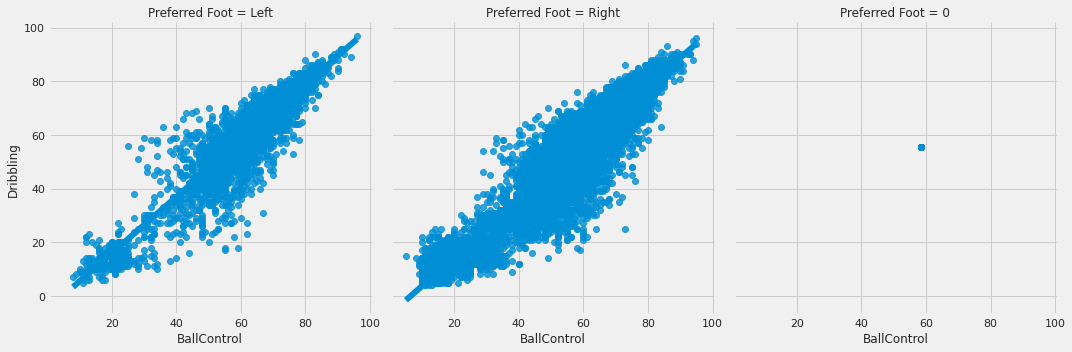

In [41]:
# comparing the performance of left-footed and right-footed footballers
# ballcontrol vs dribbing

sns.lmplot(x = 'BallControl', y = 'Dribbling', data = ffa, col = 'Preferred Foot')
plt.show()

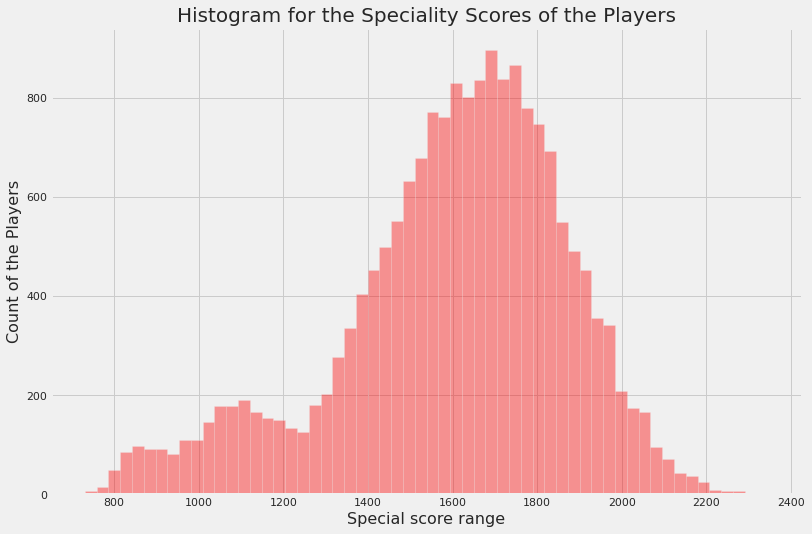

In [78]:
x = ffa.Special
plt.figure(figsize = (12, 8))
plt.style.use('tableau-colorblind10')

ax = sns.distplot(x, bins = 58, kde = False, color = 'Red')
ax.set_xlabel(xlabel = 'Special score range', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of the Players',fontsize = 16)
ax.set_title(label = 'Histogram for the Speciality Scores of the Players', fontsize = 20)
plt.show()

In [71]:
#Player with maximum Potential and Overall Performance
player = str(ffa.loc[ffa['Potential'].idxmax()][1])
print('Maximum Potential : '+str(ffa.loc[ffa['Potential'].idxmax()][1]))
print('Maximum Overall Perforamnce : '+str(ffa.loc[ffa['Overall'].idxmax()][1]))

Maximum Potential : K. Mbappé
Maximum Overall Perforamnce : L. Messi


In [72]:
pr_cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
i=0
while i < len(pr_cols):
    print('Best {0} : {1}'.format(pr_cols[i],ffa.loc[ffa[pr_cols[i]].idxmax()][1]))
    i += 1

Best Crossing : K. De Bruyne
Best Finishing : L. Messi
Best HeadingAccuracy : Naldo
Best ShortPassing : L. Modrić
Best Volleys : E. Cavani
Best Dribbling : L. Messi
Best Curve : Quaresma
Best FKAccuracy : L. Messi
Best LongPassing : T. Kroos
Best BallControl : L. Messi
Best Acceleration : Douglas Costa
Best SprintSpeed : K. Mbappé
Best Agility : Neymar Jr
Best Reactions : Cristiano Ronaldo
Best Balance : Bernard
Best ShotPower : Cristiano Ronaldo
Best Jumping : Cristiano Ronaldo
Best Stamina : N. Kanté
Best Strength : A. Akinfenwa
Best LongShots : L. Messi
Best Aggression : B. Pearson
Best Interceptions : N. Kanté
Best Positioning : Cristiano Ronaldo
Best Vision : L. Messi
Best Penalties : M. Balotelli
Best Composure : L. Messi
Best Marking : A. Barzagli
Best StandingTackle : G. Chiellini
Best SlidingTackle : Sergio Ramos
Best GKDiving : De Gea
Best GKHandling : J. Oblak
Best GKKicking : M. Neuer
Best GKPositioning : G. Buffon
Best GKReflexes : De Gea


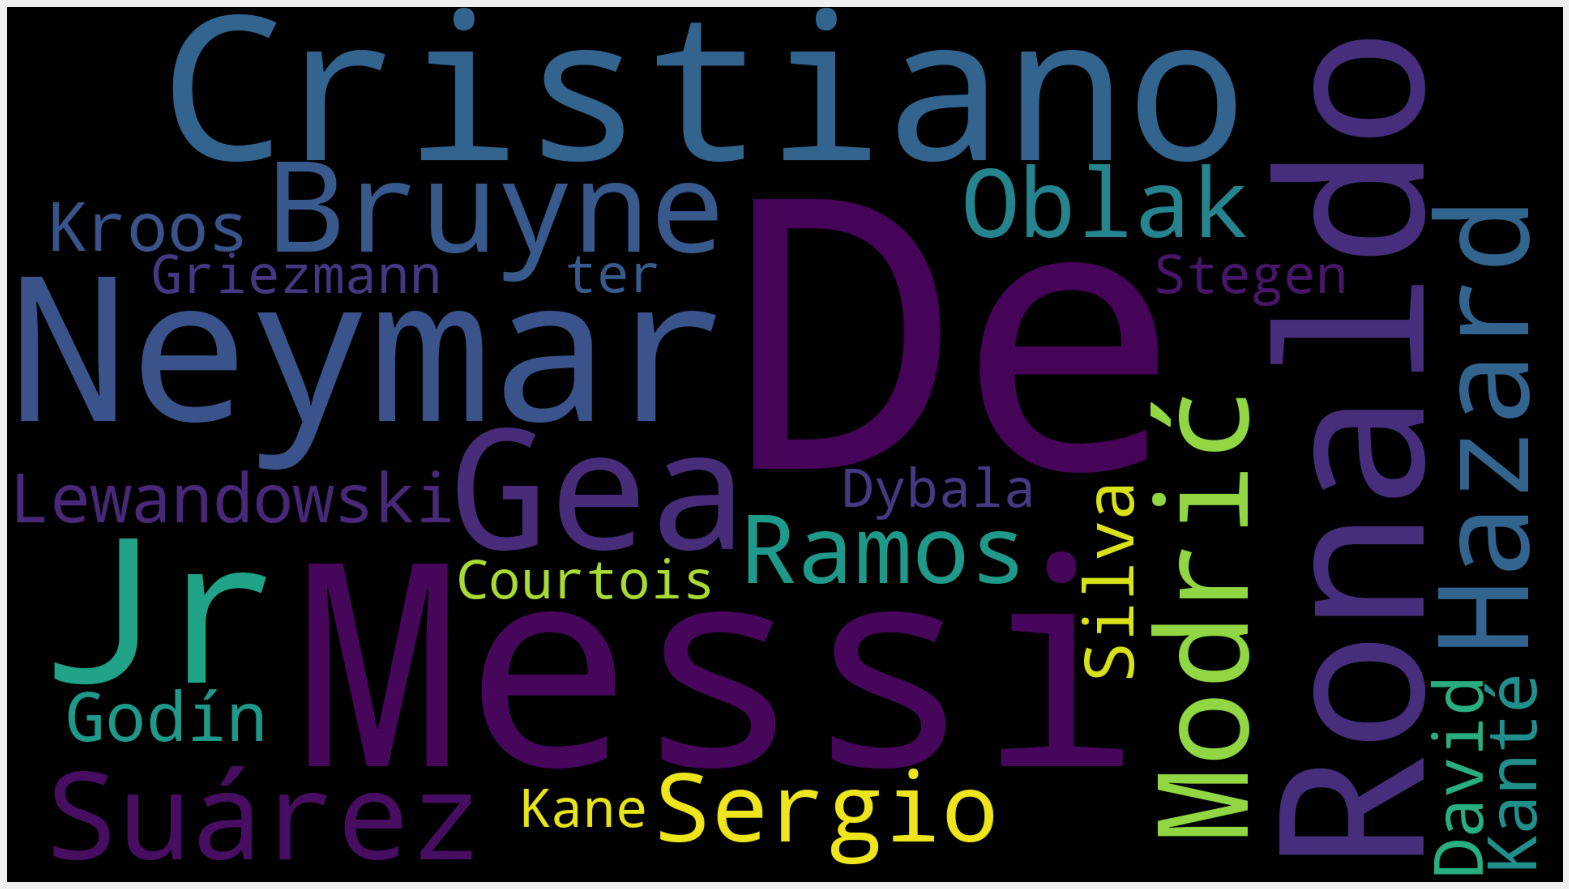

In [73]:
 #showing the name of the players which occurs the most number of times from the first 20 names
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(ffa.Name[0:20]))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('players.png')
plt.show()

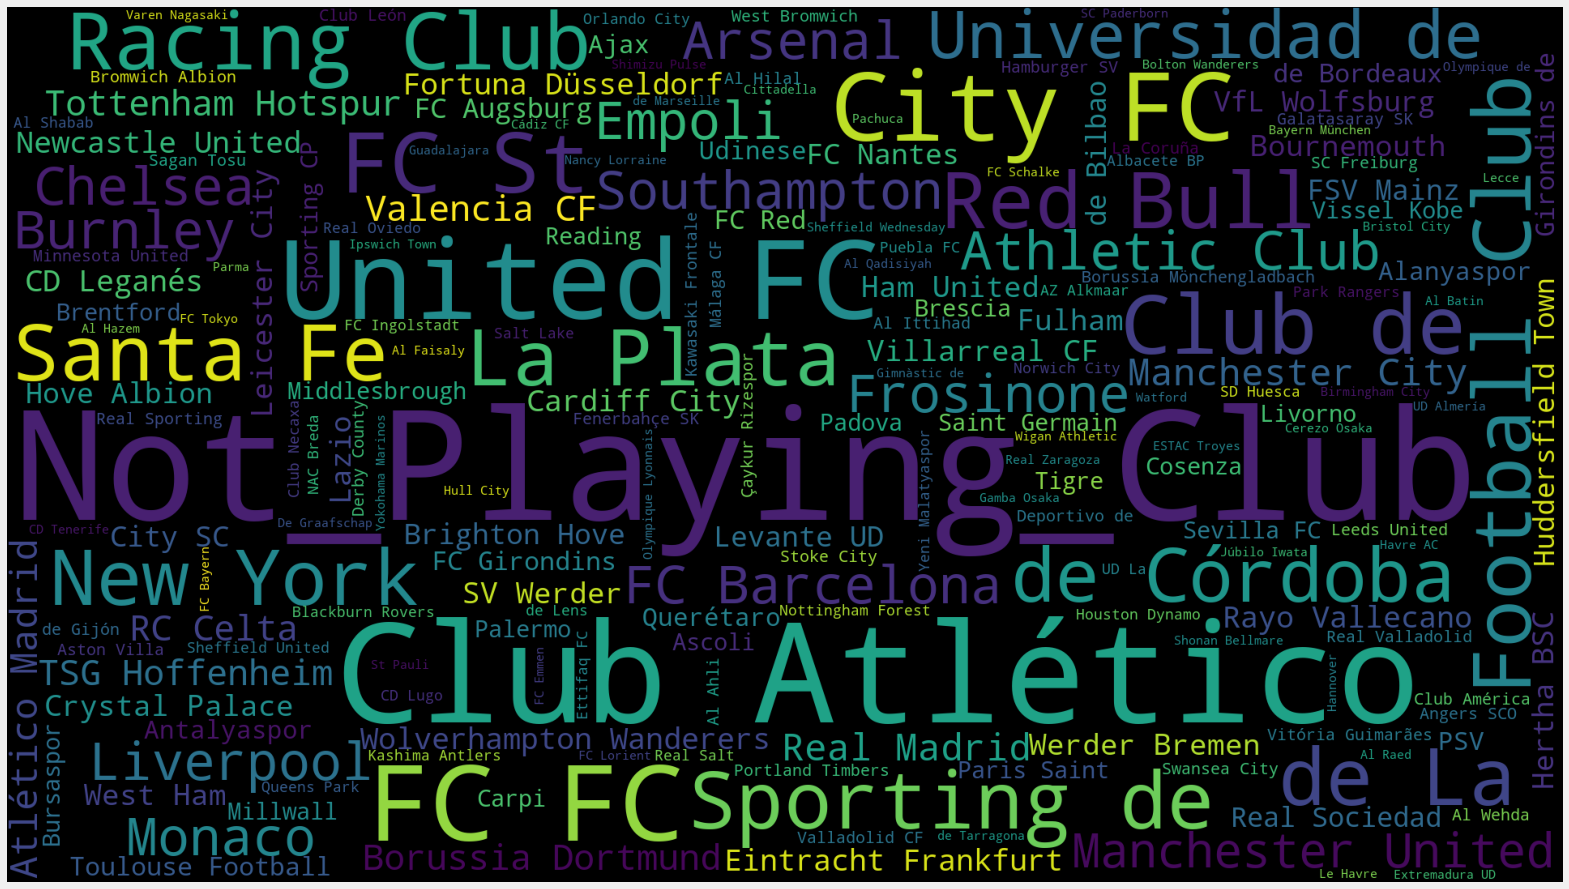

In [75]:
# checking which clubs have been mentioned the most
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(ffa.Club))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('clubs.png')
plt.show()